In [25]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()

'/users/ppradeepkumar/DeepRL1'

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
os.chdir('/users/ppradeepkumar/DeepRL1')

In [27]:
!pwd

/users/ppradeepkumar/DeepRL1


In [31]:
import json
import re
import time
import pandas as pd

#index=5

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 42}

#matplotlib.rc('font', **font)


def get_each(index,ax=None):
    #plt.clf()
    fh = open('state_action.txt')
    #print(fh)
    d1=dict()
    d1={'act':[],'price':[],'count':[],'ind1':[],'ind2':[],'ind3':[],'ind4':[]}

    print(index)
    s1=''
    for l in fh:
        #print(l)
        l = l.rstrip()
        s1 = s1+l
        if l.find(']')>=0:
 
            s1=s1.replace('[','')
            s1=s1.replace(']','')
            s1=re.sub('\s+',',',s1)
            #print(s1)
            s1=s1.split(',')
            #print('^'*10)
            #print(type(s1))
            #print('-'*10)
            #print(len(s1))
            #print('^'*10)
            if len(s1)== 30:
                #print(s1[1])
                d1['act'].append(s1[index])
                #break
            

            if len(s1)>= 181:
                d1['price'].append(s1[index])
                d1['count'].append(s1[30+index])
                d1['ind4'].append(s1[60+index])
                d1['ind1'].append(s1[90+index])
                d1['ind2'].append(s1[120+index])
                d1['ind3'].append(s1[150+index])
        
       
            s1=''

    #print(d1)
    df = pd.DataFrame(data=d1)
    #print(df)
    df= df.apply(pd.to_numeric)
    
    #plt.figure(figsize=(400,200))
    df['act']=df['act']*100
    #df[['price','count']].plot(ax=ax,figsize=(20,10))
    df1 = df.copy()
    print(df1)
    df1.rename(columns={"price": "AdjClosePrice", "count": "Num of Stocks"}, inplace=True)
    ax = df1[['AdjClosePrice','Num of Stocks']].plot(ax=ax, figsize=(10,10),linewidth=2,legend=True, fontsize=25)
    ax.legend(loc=2,fontsize=20)
    
    plt.show()
    return df1

In [47]:
df= df.apply(pd.to_numeric)
df

NameError: name 'df' is not defined

In [83]:
import json
import re
import time
import pandas as pd

d1=dict()

def get_each1(ax=None):
    fh = open('state_action.txt')

    #for index in range(1,2):
    #print(index)
    s1=''
    cnt=0
    for l in fh:
        cnt=cnt+1
        #print(l)
        l = l.rstrip()
        s1 = s1+l
        if l.find(']')>=0:

            s1=s1.replace('[','')
            s1=s1.replace(']','')
            s1=re.sub('\s+',',',s1)
            #print(s1)
            s1=s1.split(',')
            #print((s1))
            
            for index in range(1,5):
            
                #print('in')
                if len(s1)== 36:
                    #print(s1[1])
                    if 'act' not in d1:
                        d1['act']=list()
                    d1['act'].append(s1[index])
    
                if len(s1)>= 181:
                    if 'price'+str(index) not in d1:
                        d1['price'+str(index)]=list()
    
                    d1['price'+str(index)].append(s1[index])
                    if 'count'+str(index) not in d1:
                        d1['count'+str(index)]=list()
    
                    d1['count'+str(index)].append(s1[30+index])
                #print(d1)
            s1=''
    

    #print('*'*20)
    #print(d1)
    df = pd.DataFrame(data=d1)
    #print(df)
    df= df.apply(pd.to_numeric)

    #fig,ax = plt.subplots(figsize=(400,200))
    #df['act']=df['act']*100
    #ax = fig.add_subplot(111)
    #ax.plot(linewidth=4)
    plt.figure()
    plt.rcParams.update({'font.size': 22})
    ax = df.plot(ax=ax,figsize=(300,150), linewidth=12,legend=True, fontsize=25)
    ax.legend(loc=2,fontsize=200)
    
    #df[['price1','count1']].plot(ax=ax, figsize=(100,100))
    plt.show()

get_each1()











<Figure size 432x288 with 0 Axes>

In [78]:
df.columns

Index(['act', 'price', 'count', 'ind1', 'ind2', 'ind3', 'ind4'], dtype='object')

In [79]:
df['act']*100

0        265733.0
1        863352.0
2       -935538.0
3       -993243.0
4       -985309.0
          ...    
1129    -148183.0
1130   -1000000.0
1131    -189068.0
1132   -1000000.0
1133    -212025.0
Name: act, Length: 1134, dtype: float64

1
        act       price  count       ind1        ind2       ind3       ind4
0     100.0         NaN    NaN        NaN         NaN        NaN        NaN
1     100.0  102.709999  100.0  38.033733 -125.127670  43.119968  -2.899841
2     100.0  100.699997  200.0  36.318829 -150.016861  50.012882  -3.209623
3     100.0   96.449997  300.0  33.058441 -178.403366  57.473740  -3.754784
4     100.0   96.959999  400.0  33.796219 -164.621887  57.473740  -4.098431
...     ...         ...    ...        ...         ...        ...        ...
1129  100.0  361.779999    0.0  62.327366   93.021736  23.584131  12.462291
1130  100.0  364.799988    0.0  63.002769  107.475021  28.112204  12.408104
1131  100.0  364.109985    0.0  62.736927  107.459160  29.726015  12.169205
1132  100.0  364.109985    0.0  62.736927  104.484612  33.331497  11.843352
1133  100.0  373.850006    0.0  64.969818  124.290085  39.039871  12.230068

[1134 rows x 7 columns]


<Figure size 3600x3600 with 0 Axes>

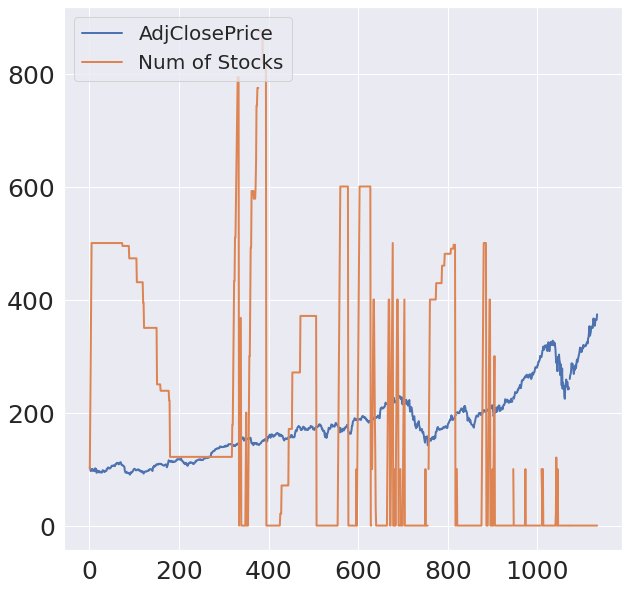

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


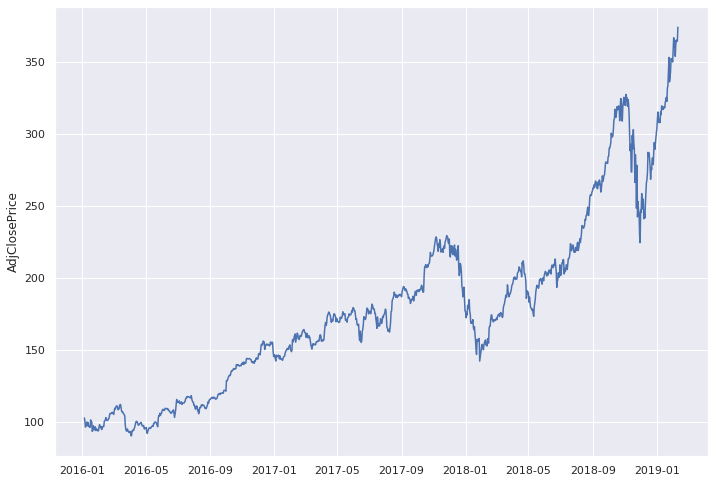

In [39]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(200, 200))
fig, axes = plt.subplots(nrows=0, ncols=0, figsize=(50, 50))

df=get_each(1)

'''
a=0
b=0
for x in range(1,30):
    get_each(x,axes[a,b])
    b = b+1
    if b == 2:
        a = a+1
        b=0
        
    if a == 2:
        break
        
'''
df.head()
df.date = pd.date_range(start='1/4/2016', periods=1134, freq='D')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y=df['AdjClosePrice'], x=df.date)
    
#plt.show()
#get_each(2,axes[0,1])
#get_each(3,axes[1,0])
#get_each(4,axes[1,1])
#get_each(5,axes[2,0])

#plt.rcParams.update({'font.size': 32})
#plt.show()
